# Chapter 2: Quantum Computing Software

Software installation and environment setup for quantum computing.

---




## Installation of Python packages
The following commands will create and actvate the quantum conda environment (assuming you have created one) and installs essential Python packages.
> conda create -n quantum <br>
> conda activate quantum <br>
> conda install python=3.11 <br>
> conda install matplotlib <br>

The following commands will install the necessary packages for D-Wave
> pip install dwave-system dwave-neal dwave-ocean-sdk  pyqubo openjij 

The following command will install the necessary packages for Qiskit
>  pip install qiskit qiskit-ibm-runtime qiskit-aer qiskit-algorithms ipykernel sympy pyqsp pylatexenc nbformat 



## Test Python environment

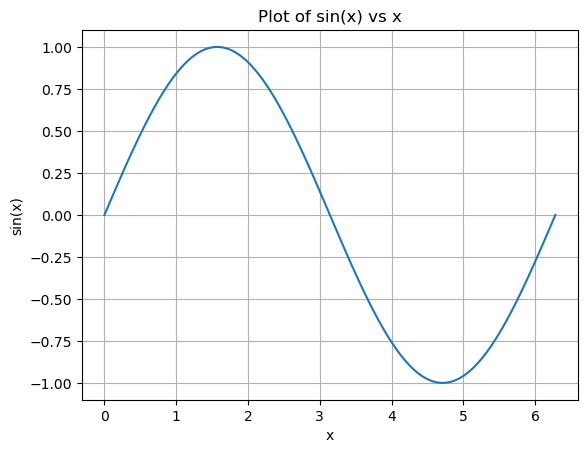

In [ ]:
# Setup and imports
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Plot of sin(x) vs x')
plt.grid(True)
plt.show()

## Test the D-Wave installation 
Solve a max-cut graph problem using simulated annealing

In [ ]:
import neal
from pyqubo import Binary, Array
import networkx as nx

G = nx.Graph() # graph package
G.add_edges_from([(1,2),(1,3),(2,4),(3,4),(3,5),(4,5)])
H = 0
q = Array.create("q",shape = 5,vartype = "BINARY")
for i, j in G.edges:# create H from graph
    H = H + 2*q[i-1]*q[j-1] - q[i-1] - q[j-1] # offset by 1

model = H.compile()
bqm = model.to_bqm()
sampler = neal.SimulatedAnnealingSampler()
results = sampler.sample(bqm)
print(results)

  q[0] q[1] q[2] q[3] q[4] energy num_oc.
0    1    0    0    1    1   -5.0       1
['BINARY', 1 rows, 1 samples, 5 variables]


## Check Qiskit version

In [ ]:
import qiskit
print(qiskit.version.get_version_info())

2.3.0


## Test the Qiskit installation 
Create, simulate and plot a quantum circuit

Counts:
 {'0': 507, '1': 493}


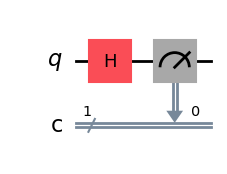

In [ ]:
from qiskit import QuantumCircuit
from Chapter08_QuantumGates_functions import simulateCircuit 

circuit = QuantumCircuit(1, 1) 
circuit.h(0)
circuit.measure(0, 0) 

counts = simulateCircuit(circuit, shots=1000)
print("Counts:\n",counts)
display(circuit.draw('mpl'))

## Set and save IBM API Token

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
# Uncomment, enter your API key and run the following line to save your IBM Quantum account token
# QiskitRuntimeService.save_account(channel="ibm_cloud",token="YourAPIKeyHere",set_as_default=True, overwrite=True)

## Run on Real Quantum Machine

In [ ]:

from Chapter08_QuantumGates_functions import runCircuitOnIBMQuantum 
counts = runCircuitOnIBMQuantum(circuit, shots=1024)
print("Counts from IBM Quantum hardware:\n", counts)



qiskit_runtime_service.__init__:WARNING:2026-01-18 16:00:06,515: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: Test. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2026-01-18 16:00:07,028: Loading instance: Test, plan: open
qiskit_runtime_service.backends:WARNING:2026-01-18 16:00:08,568: Using instance: Test, plan: open


Using backend: <IBMBackend('ibm_fez')>
Counts from IBM Quantum hardware:
 {'1': 503, '0': 521}


## D-Wave Qubit Race

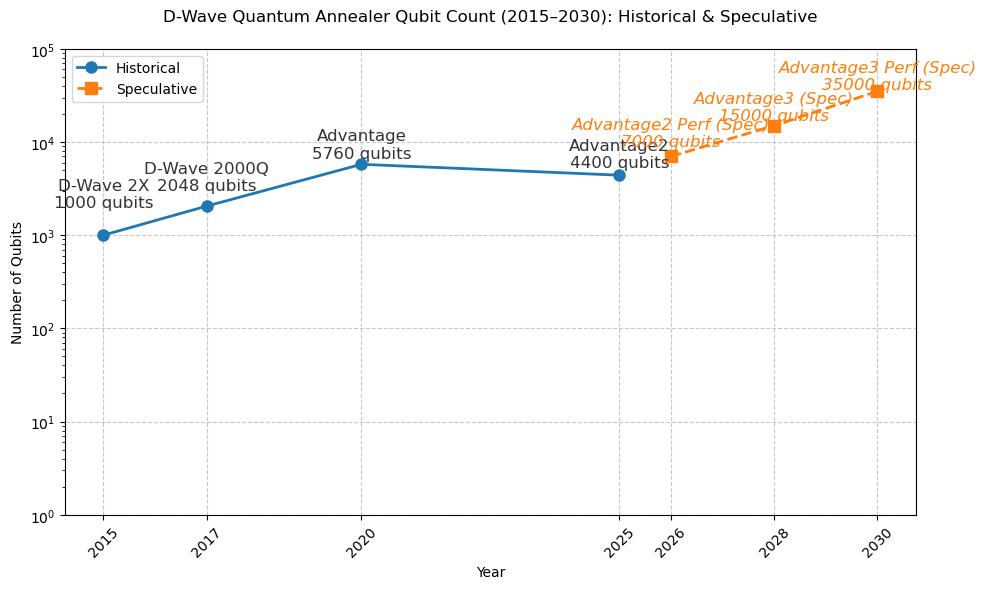

In [ ]:

# Historical data (2015–2025)
years_hist = [2015, 2017, 2020, 2025]
qubits_hist = [1000, 2048, 5760, 4400]
models_hist = ['D-Wave 2X', 'D-Wave 2000Q', 'Advantage', 'Advantage2']

# Speculative future data (2026–2030)
years_spec = [2026, 2028, 2030]
qubits_spec = [7000, 15000, 35000]  # Informed estimates based on D-Wave roadmap
models_spec = ['Advantage2 Perf (Spec)', 'Advantage3 (Spec)', 'Advantage3 Perf (Spec)']

# Combine for full timeline
years = years_hist + years_spec
qubits = qubits_hist + qubits_spec
models = models_hist + models_spec
is_spec = [False] * len(years_hist) + [True] * len(years_spec)

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(years_hist, qubits_hist, marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=8, label='Historical')
plt.plot(years_spec, qubits_spec, marker='s', linestyle='--', color='#ff7f0e', linewidth=2, markersize=8, label='Speculative')

plt.grid(True, linestyle='--', alpha=0.7)

# Add labels for each data point
for i in range(len(years)):
    offset = 1000 if not is_spec[i] else 2000  # Slightly larger offset for future points
    style = 'normal' if not is_spec[i] else 'italic'
    color = '#333333' if not is_spec[i] else '#ff7f0e'
    plt.text(years[i], qubits[i] + offset, f'{models[i]}\n{qubits[i]} qubits', 
             ha='center', fontsize=12, color=color, style=style)

# Customize the plot
plt.title('D-Wave Quantum Annealer Qubit Count (2015–2030): Historical & Speculative', fontsize=12, pad=20)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Qubits', fontsize=10)
plt.xticks(years, rotation=45)  # Rotate for better fit with extended timeline
plt.yscale('log')
plt.ylim(1, 100000)  # Adjust y-axis for speculative growth
plt.legend(loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

## IBM Qubit Race

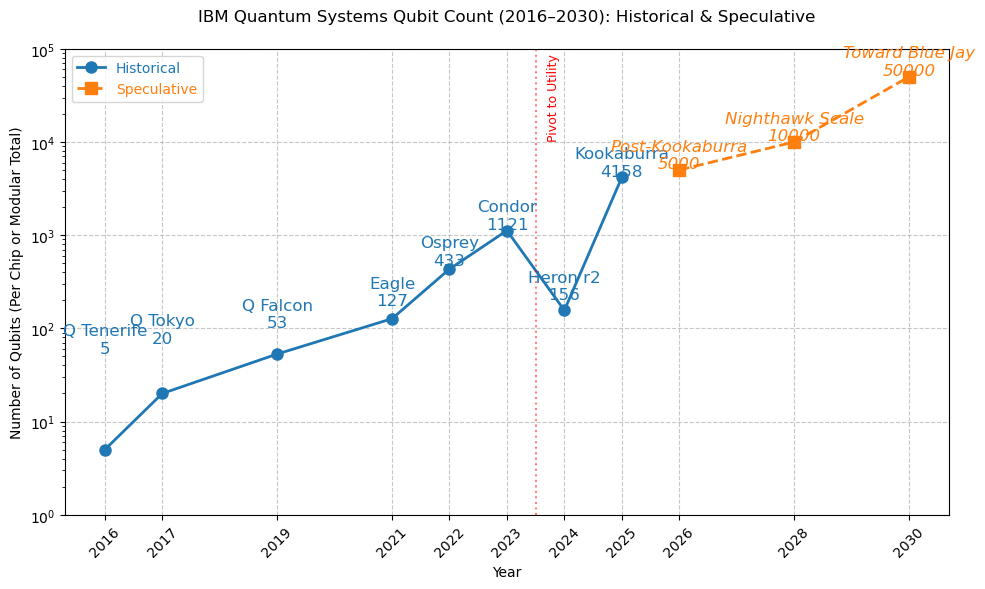

In [ ]:


# Historical data (2016–2025)
years_hist = [2016, 2017, 2019, 2021, 2022, 2023, 2024, 2025]
qubits_hist = [5, 20, 53, 127, 433, 1121, 156, 4158]  # Heron at 156; Kookaburra modular total
models_hist = ['Q Tenerife', 'Q Tokyo', 'Q Falcon', 'Eagle', 'Osprey', 'Condor', 'Heron r2', 'Kookaburra']

# Speculative future data (2026–2030)
years_spec = [2026, 2028, 2030]
qubits_spec = [5000, 10000, 50000]  # Post-Kookaburra scaling toward fault-tolerance
models_spec = ['Post-Kookaburra', 'Nighthawk Scale', 'Toward Blue Jay']

# Combine for full timeline
years = years_hist + years_spec
qubits = qubits_hist + qubits_spec
models = models_hist + models_spec
is_spec = [False] * len(years_hist) + [True] * len(years_spec)

# Create the line plot
plt.figure(figsize=(10, 6))
# Single historical line
plt.plot(years_hist, qubits_hist, marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=8, label='Historical')
# Speculative line
plt.plot(years_spec, qubits_spec, marker='s', linestyle='--', color='#ff7f0e', linewidth=2, markersize=8, label='Speculative')
# Pivot line
plt.axvline(x=2023.5, color='red', linestyle=':', alpha=0.5, label='Pivot to Utility Focus')
# Text next to pivot line
plt.text(2023.7, 30000, 'Pivot to Utility', color='red', fontsize=9, rotation=90, verticalalignment='center')

# Add labels for data points
for i in range(len(years)):
    offset = max(50, qubits[i] * 0.05)
    style = 'italic' if is_spec[i] else 'normal'
    color = '#ff7f0e' if is_spec[i] else '#1f77b4'
    plt.text(years[i], qubits[i] + offset, f'{models[i]}\n{qubits[i]}', 
             ha='center', fontsize=12, color=color, style=style)

# Customize
plt.title('IBM Quantum Systems Qubit Count (2016–2030): Historical & Speculative', fontsize=12, pad=20)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Qubits (Per Chip or Modular Total)', fontsize=10)
plt.xticks(years, rotation=45)
plt.yscale('log')
plt.ylim(1, 100000)
plt.legend(['Historical', 'Speculative'], loc='upper left', 
           labelcolor=['#1f77b4', '#ff7f0e'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()